In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns


In [3]:
# Load the dataset from the XLSX file
df = pd.read_excel('data/customer_booking_data.xlsx')

# Check the first few rows to understand the structure
df.head()


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [12]:
# Check for basic statistics of the dataset
print(df.describe())

# Check for missing values
print(df.isnull().sum())

       num_passengers  purchase_lead  length_of_stay  flight_hour  \
count    50000.000000   50000.000000     50000.00000  50000.00000   
mean         1.591240      84.940480        23.04456      9.06634   
std          1.020165      90.451378        33.88767      5.41266   
min          1.000000       0.000000         0.00000      0.00000   
25%          1.000000      21.000000         5.00000      5.00000   
50%          1.000000      51.000000        17.00000      9.00000   
75%          2.000000     115.000000        28.00000     13.00000   
max          9.000000     867.000000       778.00000     23.00000   

       wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
count         50000.000000          50000.000000           50000.000000   
mean              0.668780              0.296960               0.427140   
std               0.470657              0.456923               0.494668   
min               0.000000              0.000000               0.000000   
25%

In [14]:
# Print the column names to inspect them
print(df.columns)


Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')


In [15]:
# Clean up column names by stripping spaces and standardizing the case
df.columns = df.columns.str.strip().str.lower()

# Now check if the target column exists
print(df.columns)


Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')


In [16]:
# Step 2: Data Preprocessing

# Split the data into features (X) and target (y)
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for categorical and numerical data
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Numerical: Standard scaling, Categorical: One-Hot Encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Create a pipeline that first applies preprocessing, then the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Step 3: Split the data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (40000, 13)
Test data shape: (10000, 13)


In [18]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Separate features (X) and target (y)
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred = pipeline.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      8520
           1       0.45      0.14      0.21      1480

    accuracy                           0.85     10000
   macro avg       0.66      0.55      0.56     10000
weighted avg       0.81      0.85      0.81     10000

Confusion Matrix:
[[8275  245]
 [1277  203]]


In [19]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())


Cross-Validation Accuracy Scores: [0.84575  0.84325  0.842875 0.84225  0.84825 ]
Mean Accuracy: 0.8444750000000001
Standard Deviation: 0.0022310311517322705


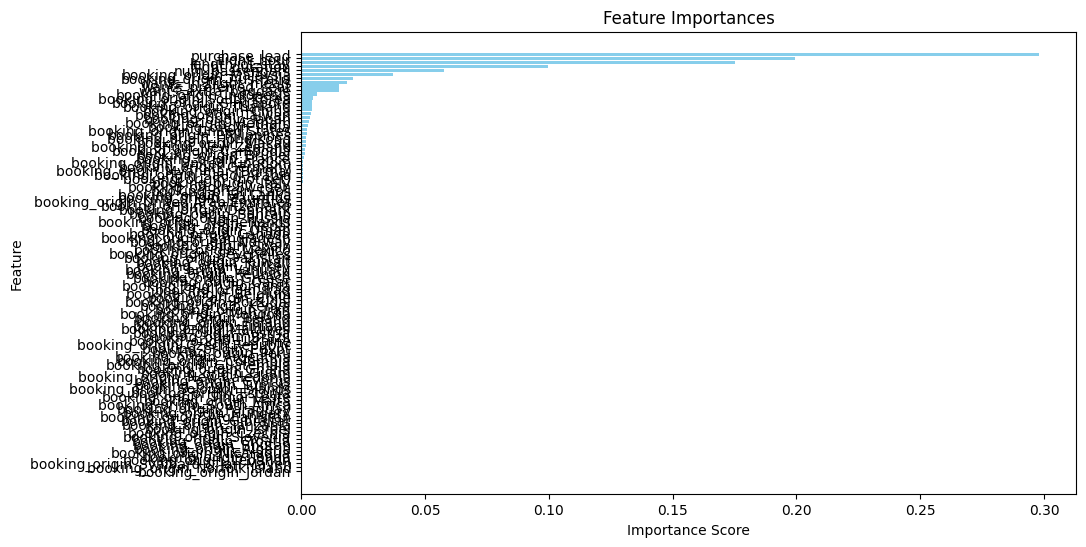

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Fit the pipeline to access the model
pipeline.fit(X_train, y_train)

# Retrieve the feature importances
rf_model = pipeline.named_steps['classifier']
cat_features = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols)
feature_names = list(numerical_cols) + list(cat_features)
importances = rf_model.feature_importances_

# Sort features by importance
sorted_idx = np.argsort(importances)[::-1]
sorted_features = [feature_names[i] for i in sorted_idx]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_features[::-1], importances[sorted_idx][::-1], color='skyblue')
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


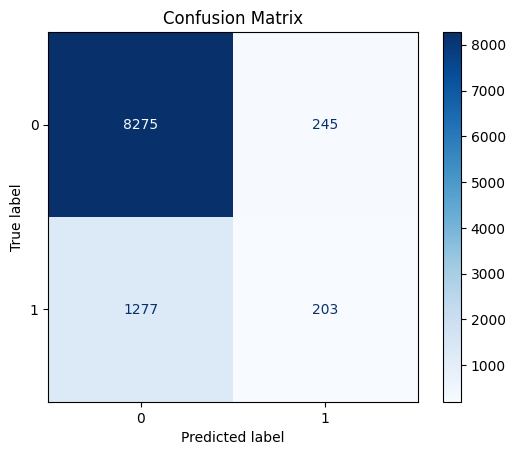

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.named_steps['classifier'].classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [29]:
from sklearn.metrics import accuracy_score

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_test_pred)

print(f"Random Forest Model Accuracy: {accuracy:.2f}")


Random Forest Model Accuracy: 0.85


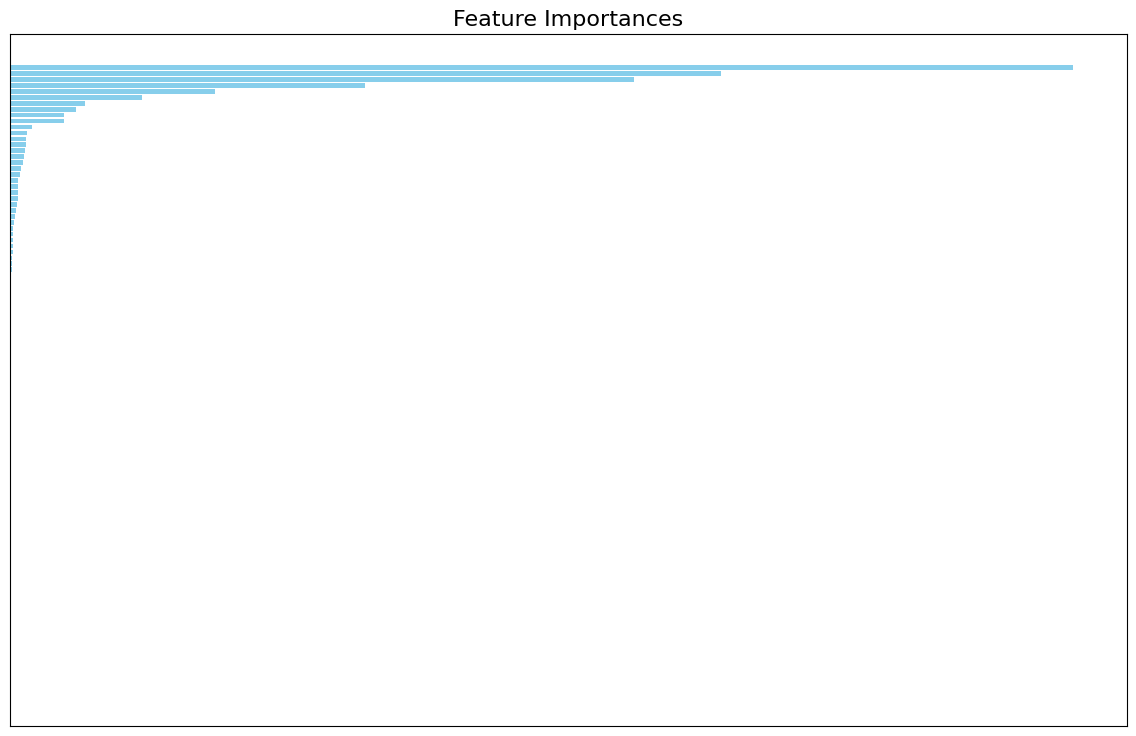

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Fit the pipeline to access the model
pipeline.fit(X_train, y_train)

# Retrieve the feature importances
rf_model = pipeline.named_steps['classifier']
cat_features = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols)
feature_names = list(numerical_cols) + list(cat_features)
importances = rf_model.feature_importances_

# Sort features by importance
sorted_idx = np.argsort(importances)[::-1]
sorted_features = [feature_names[i] for i in sorted_idx]

# Plot feature importance with only feature names on the left
plt.figure(figsize=(12, 8))  # Adjust figure size
plt.barh(sorted_features[::-1], importances[sorted_idx][::-1], color='skyblue')

# Title and labels
plt.title("Feature Importances", fontsize=16)

# Hide x-axis and y-axis labels and ticks
plt.xlabel("")
plt.ylabel("")

# Remove ticks on the x-axis and y-axis
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks

# Increase padding between plot and labels for better visualization
plt.tight_layout(pad=3.0)

plt.show()


